# Import all the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Read the data and store the dataset.

In [80]:
data= pd.read_csv("/content/dataset.csv")
data.iloc[0:5,:]

,country,date,sector,value,timestamp
0,Brazil,01/01/2019,Power,0.096799,1546300800
1,China,01/01/2019,Power,14.816100,1546300800
2,EU27 & UK,01/01/2019,Power,1.886490,1546300800
3,France,01/01/2019,Power,0.051217,1546300800
4,Germany,01/01/2019,Power,0.315002,1546300800


In [81]:
data.info

<bound method DataFrame.info of           country        date                  sector      value   timestamp
0          Brazil  01/01/2019                   Power   0.096799  1546300800
1           China  01/01/2019                   Power  14.816100  1546300800
2       EU27 & UK  01/01/2019                   Power   1.886490  1546300800
3          France  01/01/2019                   Power   0.051217  1546300800
4         Germany  01/01/2019                   Power   0.315002  1546300800
...           ...         ...                     ...        ...         ...
135403     Russia  31/05/2023  International Aviation   0.016524  1685491200
135404      Spain  31/05/2023  International Aviation   0.068408  1685491200
135405         UK  31/05/2023  International Aviation   0.103774  1685491200
135406         US  31/05/2023  International Aviation   0.200409  1685491200
135407      WORLD  31/05/2023  International Aviation   1.558450  1685491200

[135408 rows x 5 columns]>

Check whether the given dataset have any Null Values or not

In [4]:
data.isnull().sum()

country      0
date         0
sector       0
value        0
timestamp    0
dtype: int64

In [5]:
data.describe

<bound method NDFrame.describe of           country        date                  sector      value   timestamp
0          Brazil  01/01/2019                   Power   0.096799  1546300800
1           China  01/01/2019                   Power  14.816100  1546300800
2       EU27 & UK  01/01/2019                   Power   1.886490  1546300800
3          France  01/01/2019                   Power   0.051217  1546300800
4         Germany  01/01/2019                   Power   0.315002  1546300800
...           ...         ...                     ...        ...         ...
135403     Russia  31/05/2023  International Aviation   0.016524  1685491200
135404      Spain  31/05/2023  International Aviation   0.068408  1685491200
135405         UK  31/05/2023  International Aviation   0.103774  1685491200
135406         US  31/05/2023  International Aviation   0.200409  1685491200
135407      WORLD  31/05/2023  International Aviation   1.558450  1685491200

[135408 rows x 5 columns]>

In [6]:
data.sector.unique()

array(['Power', 'Industry', 'Ground Transport', 'Residential',
       'Domestic Aviation', 'International Aviation'], dtype=object)

In [7]:
data['value'].describe()

count    135408.000000
mean          2.359439
std           5.908582
min           0.000078
25%           0.078661
50%           0.314597
75%           1.636632
max          46.263500
Name: value, dtype: float64

Group the data by Country and find out the Values based on that Country

In [94]:
grouped_by_country = data.groupby('country')['value'].sum()
print(grouped_by_country)

country
Brazil         562.345482
China        18642.332640
EU27 & UK     2799.221819
France         258.345005
Germany        523.157692
India         3260.301565
Italy          234.670266
Japan         1120.051613
ROW          15824.444360
Russia        1291.872144
Spain          266.889250
UK             279.987894
US            4380.399670
WORLD        47880.966800
Name: value, dtype: float64


In [8]:
data.columns

Index(['country', 'date', 'sector', 'value', 'timestamp'], dtype='object')

In [10]:
sector_grouped = data.groupby('sector')['value'].mean()
sector_grouped

sector
Domestic Aviation         0.125072
Ground Transport          2.574027
Industry                  4.312522
International Aviation    0.187936
Power                     5.463784
Residential               1.493293
Name: value, dtype: float64

In [11]:
data['date'] = pd.to_datetime(data['date'])

<ipython-input-11-a011fda2e204>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


Plot a graph based on the Values

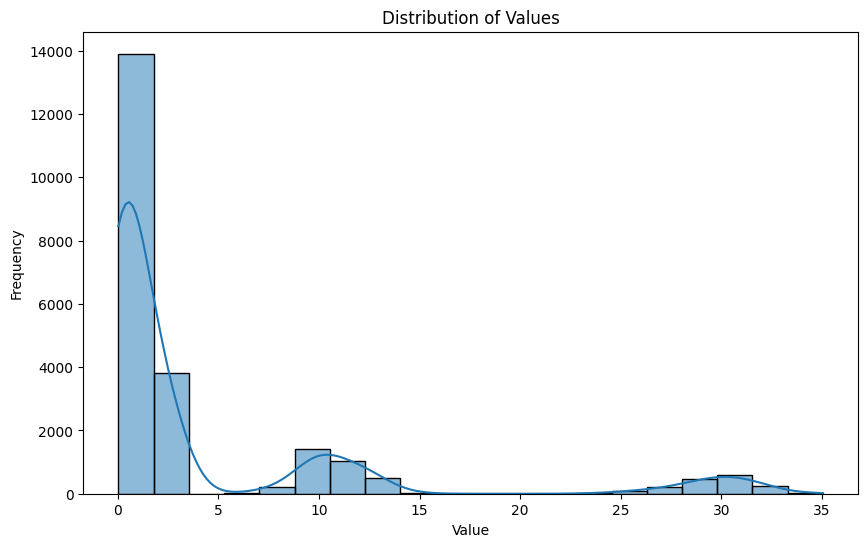

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data['value'], bins=20, kde=True)
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# 1. **Sector Analysis**: Analyze trends and patterns in different sectors over time.

Group the data based on Sector over time

In [12]:
sector_trends = data.groupby(['sector', 'date'])['value'].mean()
sector_trends = sector_trends.reset_index()

Plotting trends for each sector

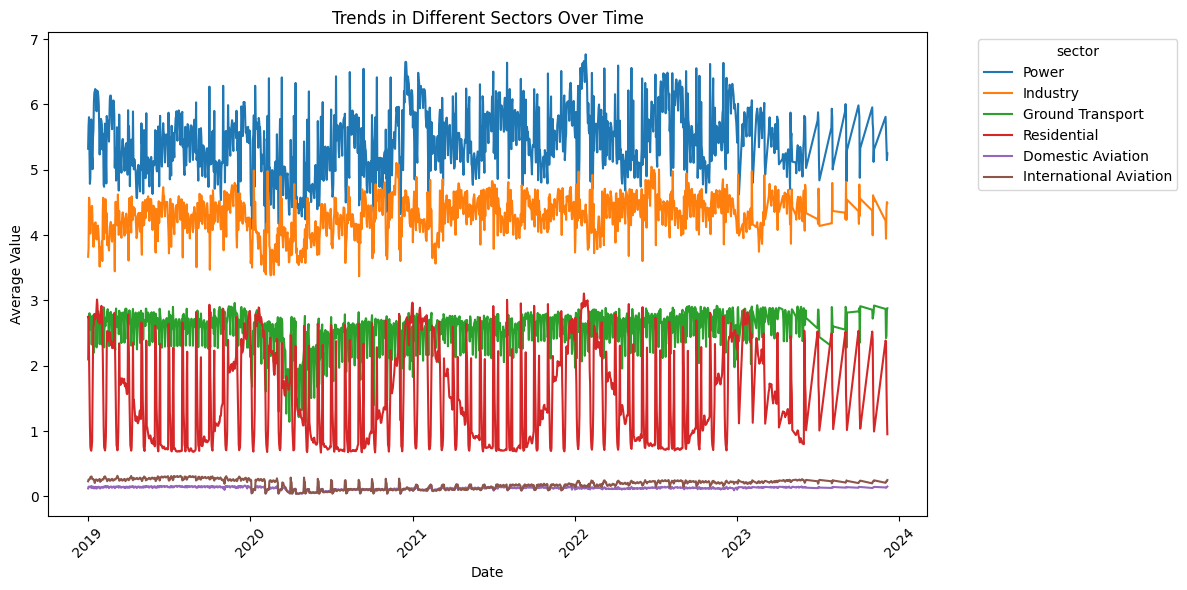

In [13]:
plt.figure(figsize=(12, 6))

# Plotting trends for each sector
sectors = data['sector'].unique()
for sector in sectors:
    sector_data = sector_trends[sector_trends['sector'] == sector]
    plt.plot(sector_data['date'], sector_data['value'], label=sector)

plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Trends in Different Sectors Over Time')
plt.legend(title= 'sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we find the Trends in different sectors over time

# 2. **Country Comparison**: Compare sector values across different countries.

In [14]:
country_sector_values = data.groupby(['country', 'sector'])['value'].sum().sort_values(ascending=False)
country_sector_values = country_sector_values.reset_index()

Plot the graph for different Countries based on Sector Values

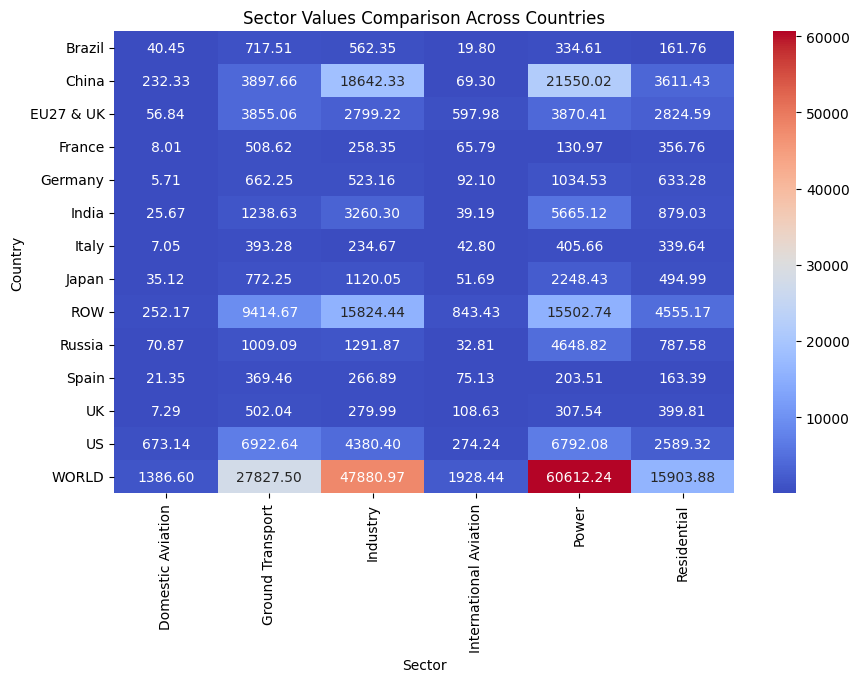

In [15]:
# Pivot the data for heatmap
pivot_data = country_sector_values.pivot(index='country', columns='sector', values='value')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Sector Values Comparison Across Countries')
plt.xlabel('Sector')
plt.ylabel('Country')
plt.show()

Here we found out the sector values comparision accross different Countries

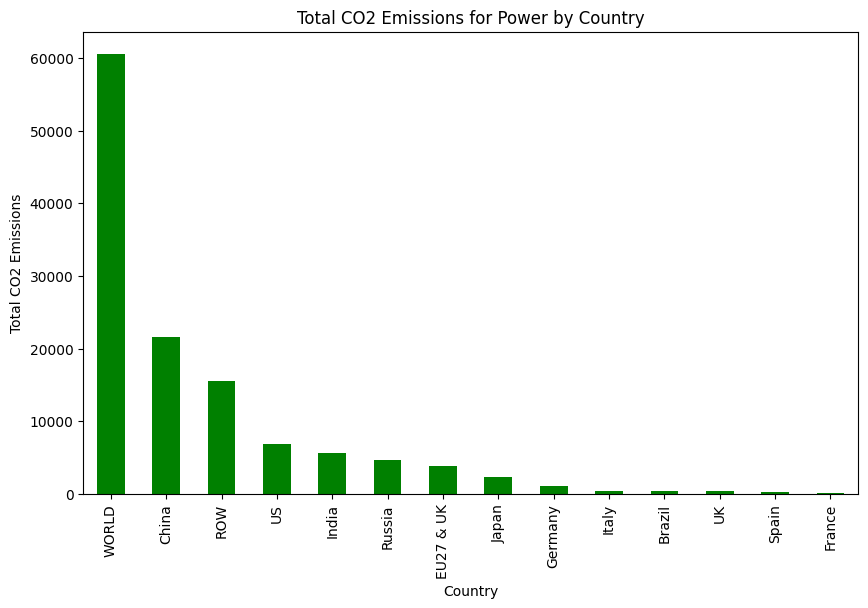

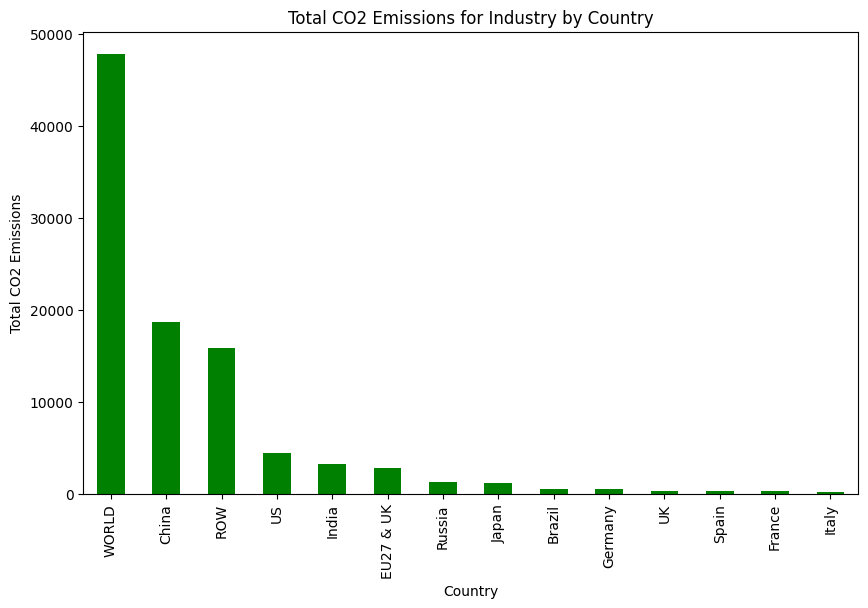

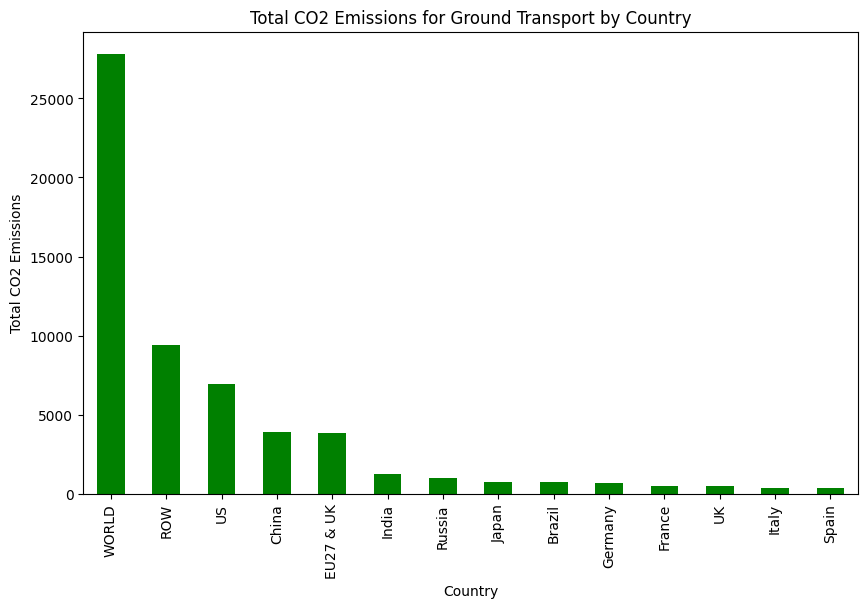

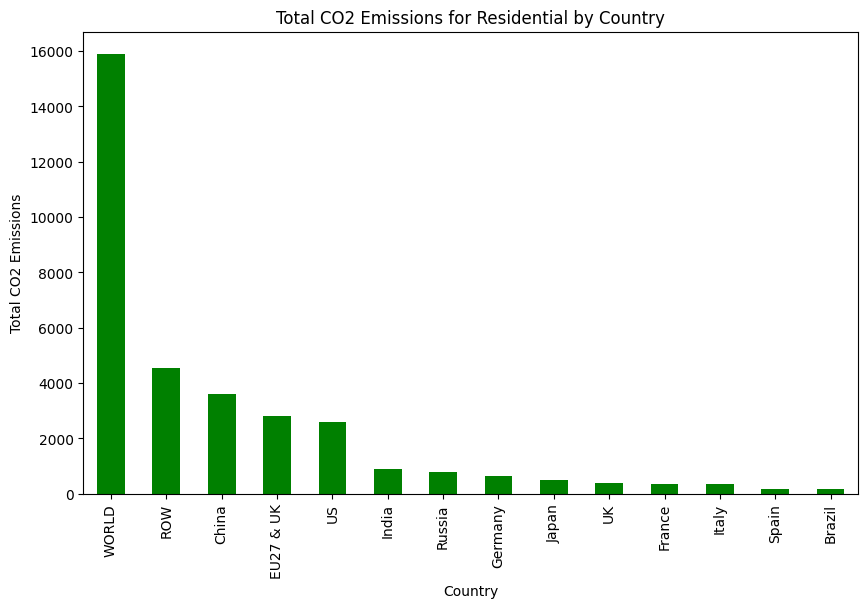

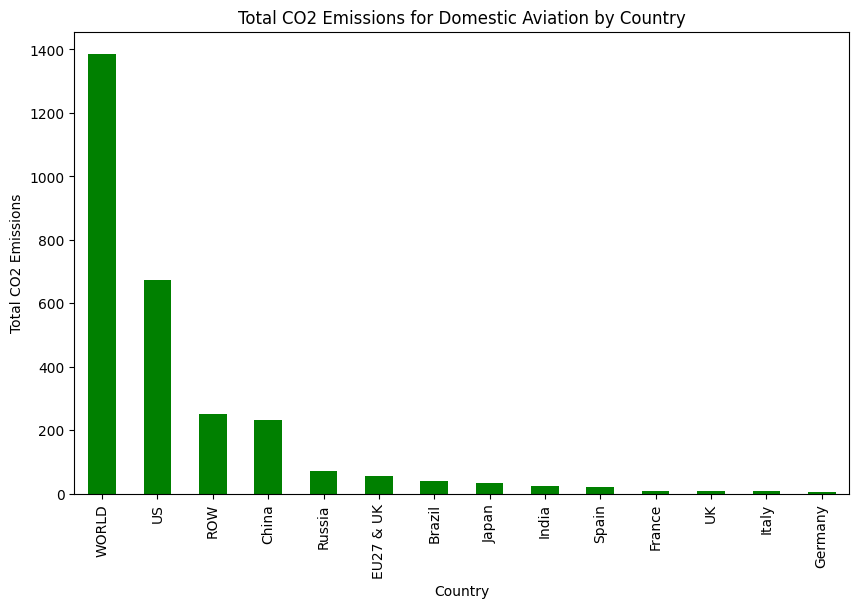

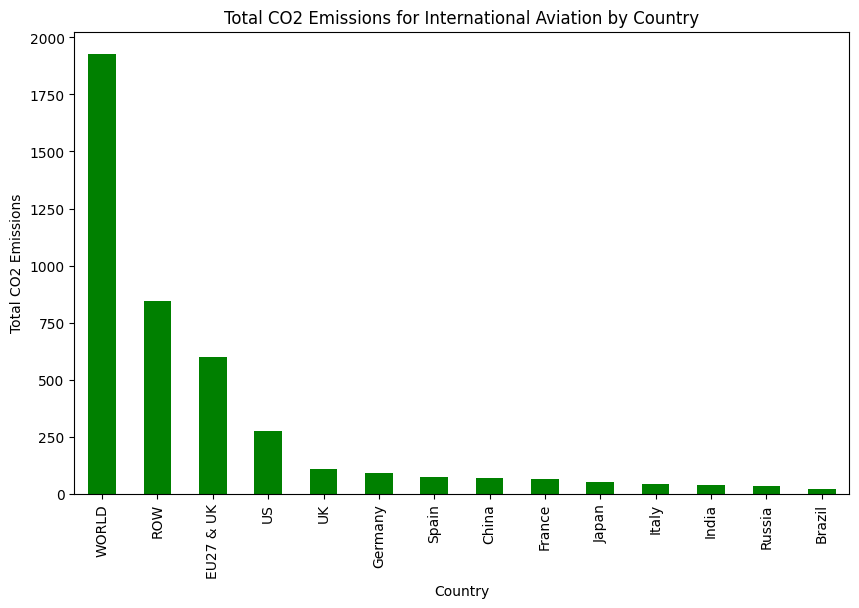

In [16]:
sector_total_emissions = data.groupby("sector")["value"].sum().sort_values(ascending=False)
sectors = data["sector"].unique()
for sector in sectors:
    sector_data = data[data["sector"] == sector]
    country_total_emissions = sector_data.groupby("country")["value"].sum().sort_values(ascending=False)
    country_total_emissions.plot(kind='bar', color='g', figsize=(10, 6))
    plt.title(f"Total CO2 Emissions for {sector} by Country")
    plt.xlabel("Country")
    plt.ylabel("Total CO2 Emissions")
    plt.show()

Here we plot the graphs for various Sectors of Total CO2 Emissions by Country

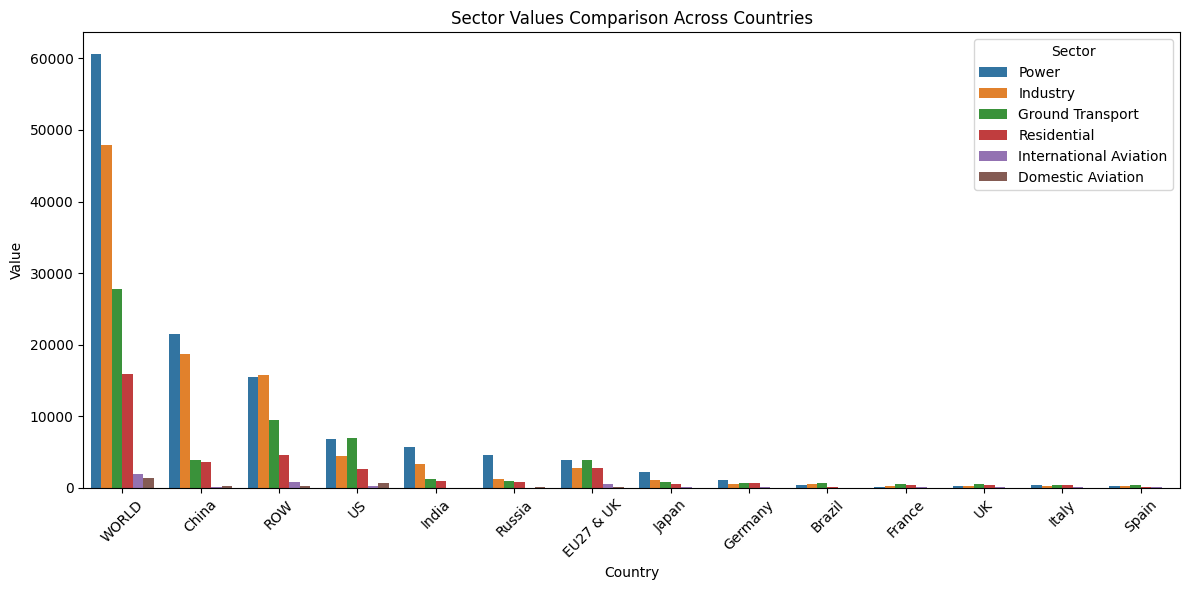

In [17]:
for sector in sectors:
    sector_data = data[data["sector"] == sector]
plt.figure(figsize=(12, 6))
sns.barplot(data=country_sector_values, x='country', y='value', hue='sector')
plt.title('Sector Values Comparison Across Countries')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Sector')
plt.show()

Here we plotted a graph based on Sector Values Comparison Across Countries

# 3. **Time Series Analysis**: Perform time series analysis to identify trends and seasonality in sector values.

In [18]:
data['Date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [19]:
sector_values = data.groupby(['sector']).resample('M').mean()
sector_values.reset_index(inplace=True)

<ipython-input-19-51a285181ac4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_values = data.groupby(['sector']).resample('M').mean()
<ipython-input-19-51a285181ac4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_values = data.groupby(['sector']).resample('M').mean()
<ipython-input-19-51a285181ac4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sector_values = data.groupby(['sector']).resample('M')

Plot the Graph for various Trends in Sector Values

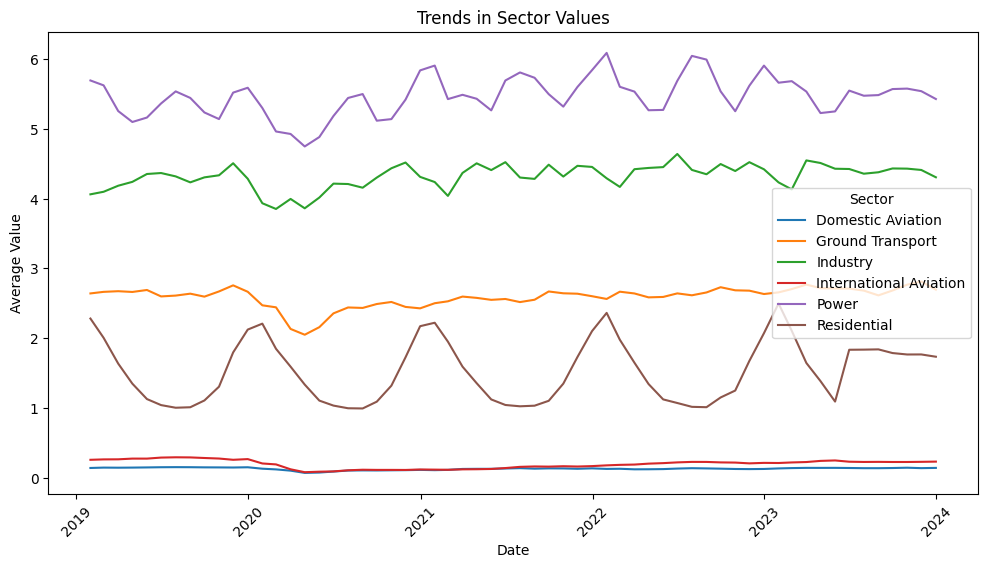

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sector_values, x='date', y='value', hue='sector')
plt.title('Trends in Sector Values')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.show()


# **4. Value Trends:** Study how sector values change over different dates and time periods.

Convert date to datatime if necessary

In [37]:
data['date'] = pd.to_datetime(data['date'])

Plot the graph for Sector Value Trends Over Different Years

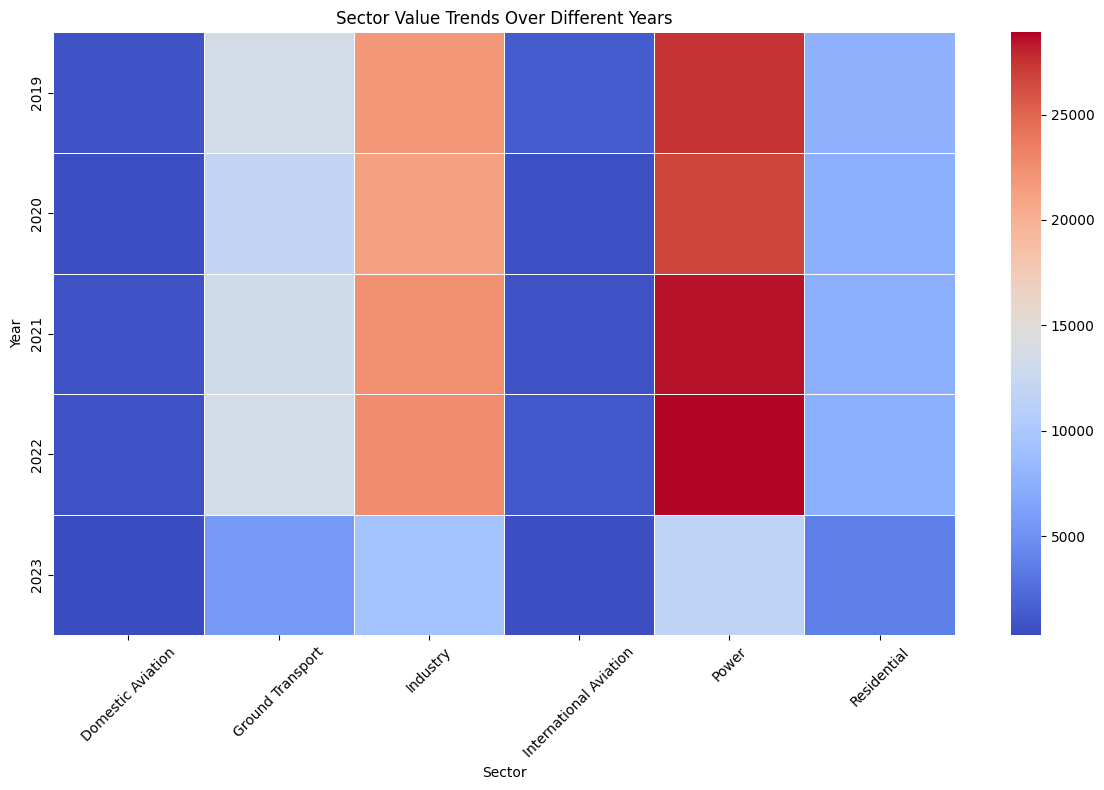

In [36]:
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%Y")
data["year"] = data["date"].dt.year
pivot_table = data.pivot_table(index="year", columns="sector", values="value", aggfunc="sum")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5)
plt.title("Sector Value Trends Over Different Years")
plt.xlabel("Sector")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here from the graph we found out the Sector Value Trends Over Different Years where Power consumption is more

# 5. **Sector Performance**: Analyze the performance of different sectors within specific countries.

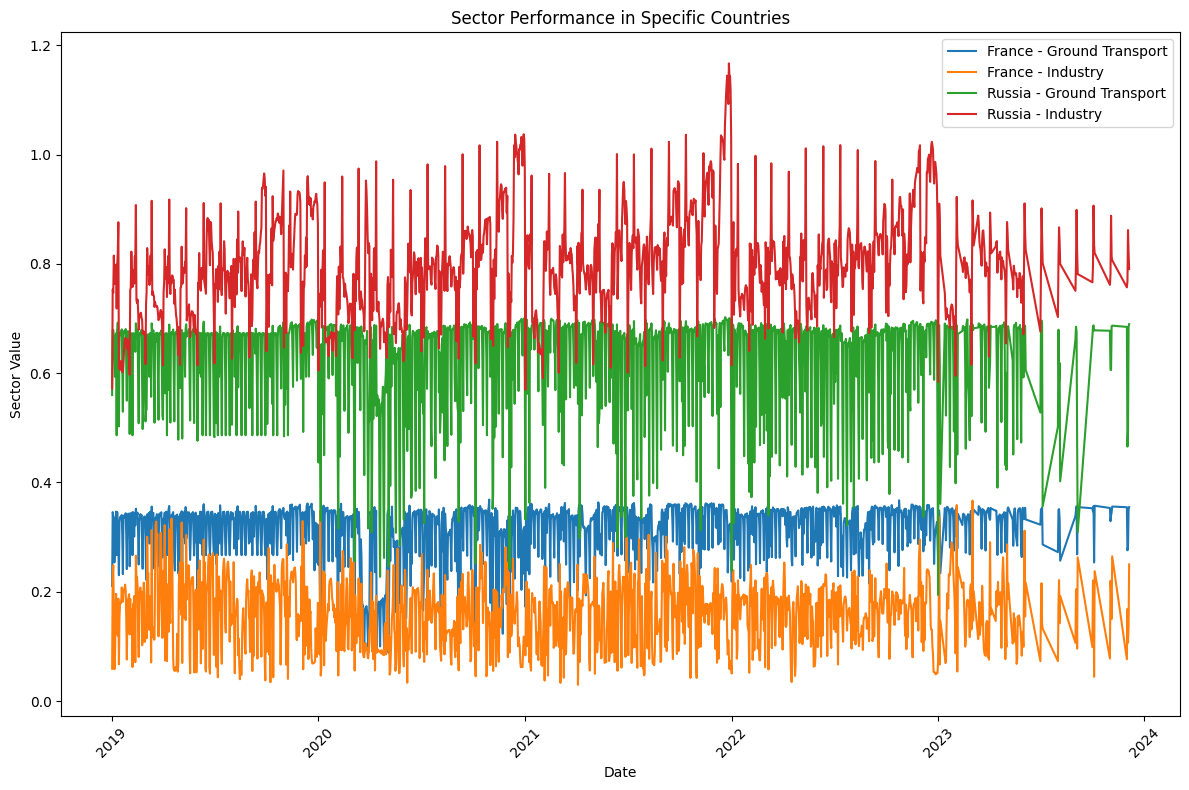

In [40]:
pivot_table = data.pivot_table(index="date", columns="sector", values="value", aggfunc="sum")
countries_to_analyze = [ "France", "Russia"]
sectors_to_analyze = ["Ground Transport", "Industry"]
filtered_data = data[data["country"].isin(countries_to_analyze) & data["sector"].isin(sectors_to_analyze)]
pivot_table = filtered_data.pivot_table(index="date", columns=["country", "sector"], values="value", aggfunc="sum")
plt.figure(figsize=(12, 8))
for country in countries_to_analyze:
    for sector in sectors_to_analyze:
        plt.plot(pivot_table.index, pivot_table[(country, sector)], label=f"{country} - {sector}")
plt.title("Sector Performance in Specific Countries")
plt.xlabel("Date")
plt.ylabel("Sector Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here in the graph we predicted the future for Sector Performance in Specific Countries based on the previous years.

# **6. Comparative Analysis:** Compare sector values between countries or sectors.

In [41]:
country_sector_values = data.groupby(['country', 'sector'])['value'].mean().reset_index()

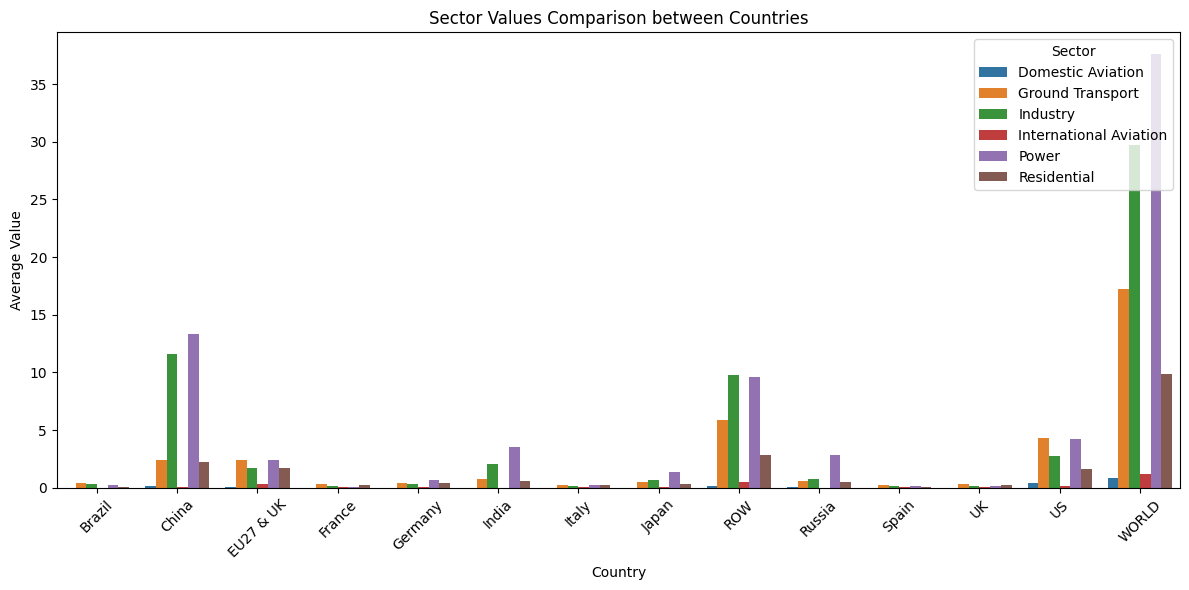

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=country_sector_values, x='country', y='value', hue='sector')
plt.title('Sector Values Comparison between Countries')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.legend(title='Sector', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here we plotted a graph for Sector Values Comparison between Countries from this we find that China has more power consumption than any other country.

In [43]:
sector_country_values = data.groupby(['sector', 'country'])['value'].mean().reset_index()

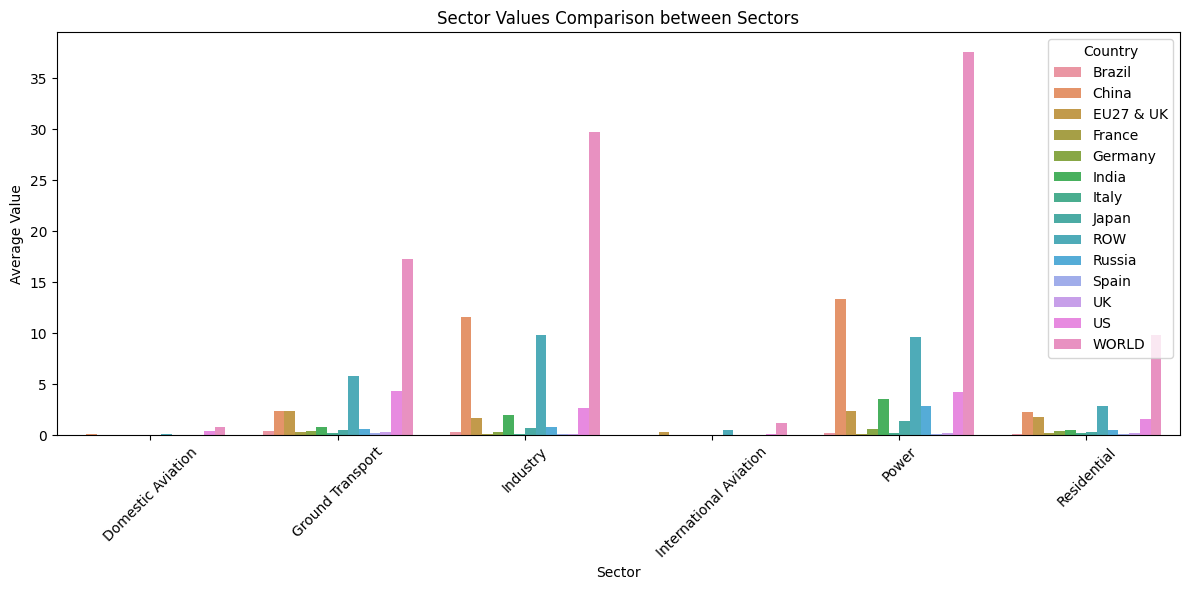

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_country_values, x='sector', y='value', hue='country')
plt.title('Sector Values Comparison between Sectors')
plt.xlabel('Sector')
plt.ylabel('Average Value')
plt.legend(title='Country', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above sectors we find the Average Value for Power is more.

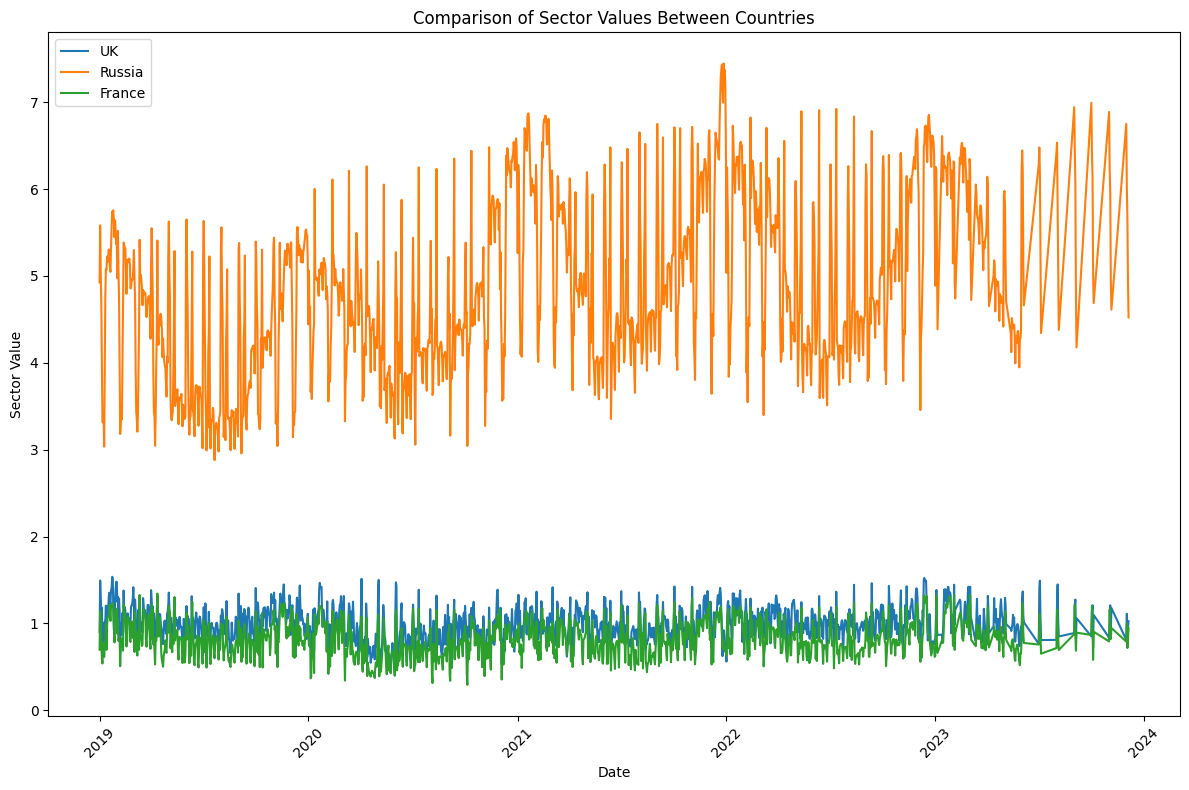

In [53]:
countries_to_compare = ["UK","Russia", "France"]
filtered_data = data[data["country"].isin(countries_to_compare)]
pivot_table = filtered_data.pivot_table(index="date", columns="country", values="value", aggfunc="sum")
plt.figure(figsize=(12, 8))

for country in countries_to_compare:
    plt.plot(pivot_table.index, pivot_table[country], label=country)

plt.title("Comparison of Sector Values Between Countries")
plt.xlabel("Date")
plt.ylabel("Sector Value")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we predicted the Sector Values Comparison between Countries for 2024.

# **7. Impact of Events:** Study how external events or factors influence sector values.

In [54]:
data.columns

Index(['country', 'date', 'sector', 'value', 'timestamp', 'year'], dtype='object')

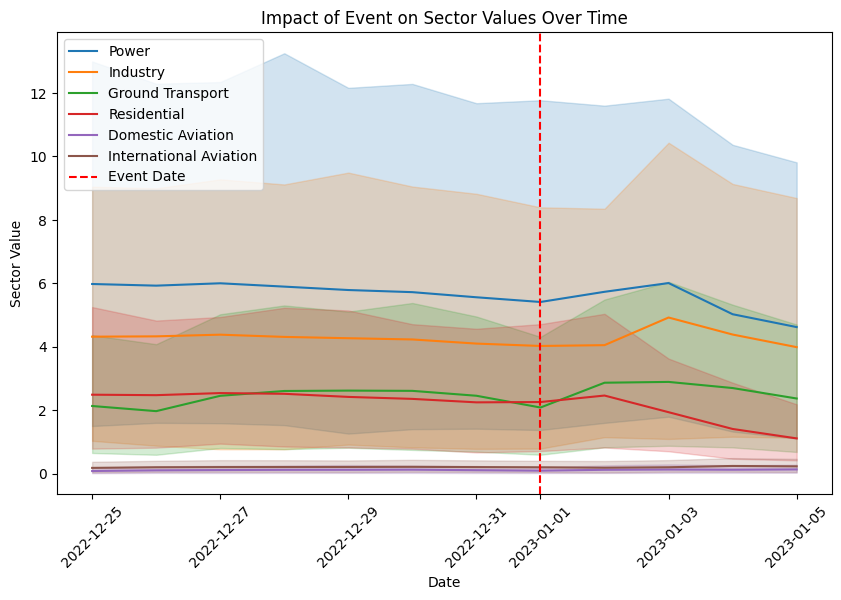

In [55]:
event_date = pd.to_datetime("2023-01-01")
days_before = 7
days_after = 7

event_data = data[(data['date'] >= event_date - pd.Timedelta(days=days_before)) &
                  (data['date'] <= event_date + pd.Timedelta(days=days_after))]

plt.figure(figsize=(10, 6))
sns.lineplot(data=event_data, x='date', y='value', hue='sector')
plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
plt.title('Impact of Event on Sector Values Over Time')
plt.xlabel('Date')
plt.ylabel('Sector Value')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

Here we plotted the graph for Impact of Event on Sector Values Over Time.

# **8. Seasonal Trends:** Identify seasonal patterns or trends in sector values.

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%Y")
pivot_table = data.pivot_table(index="date", columns="sector", values="value", aggfunc="sum")
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [57]:
data.columns

Index(['country', 'date', 'sector', 'value', 'timestamp', 'year'], dtype='object')

In [58]:
data.sector.unique()

array(['Power', 'Industry', 'Ground Transport', 'Residential',
       'Domestic Aviation', 'International Aviation'], dtype=object)

# **9. Predictive Models:** Build models to predict future sector values based on historical data.

In [61]:
data.columns

Index(['country', 'date', 'sector', 'value', 'timestamp', 'year'], dtype='object')

In [72]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')['value']

<ipython-input-72-d434fc33db80>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


In [67]:
from statsmodels.tsa.arima_model import ARIMA

Import the Libraries for scikit-learn

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

Now find the target value and set the target column in a variable

In [82]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
X = data[['month', 'year']]
y = data['value']

<ipython-input-82-868cef607b17>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date'] = pd.to_datetime(data['date'])


Train and test the given dataset and split the data accordingly.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now by using Random Forest we predict the values

In [84]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Now find out the Mean absolute, mean squared as well as Root mean square Error by using Stats_models

In [86]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 3.14
Mean Squared Error: 35.46
Root Mean Squared Error: 5.96


By using SARIMA model we predict and drawn the graphs for sector based on date.

<ipython-input-87-d377f91fa8ef>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_monthly = data.resample('M', on='date').sum()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


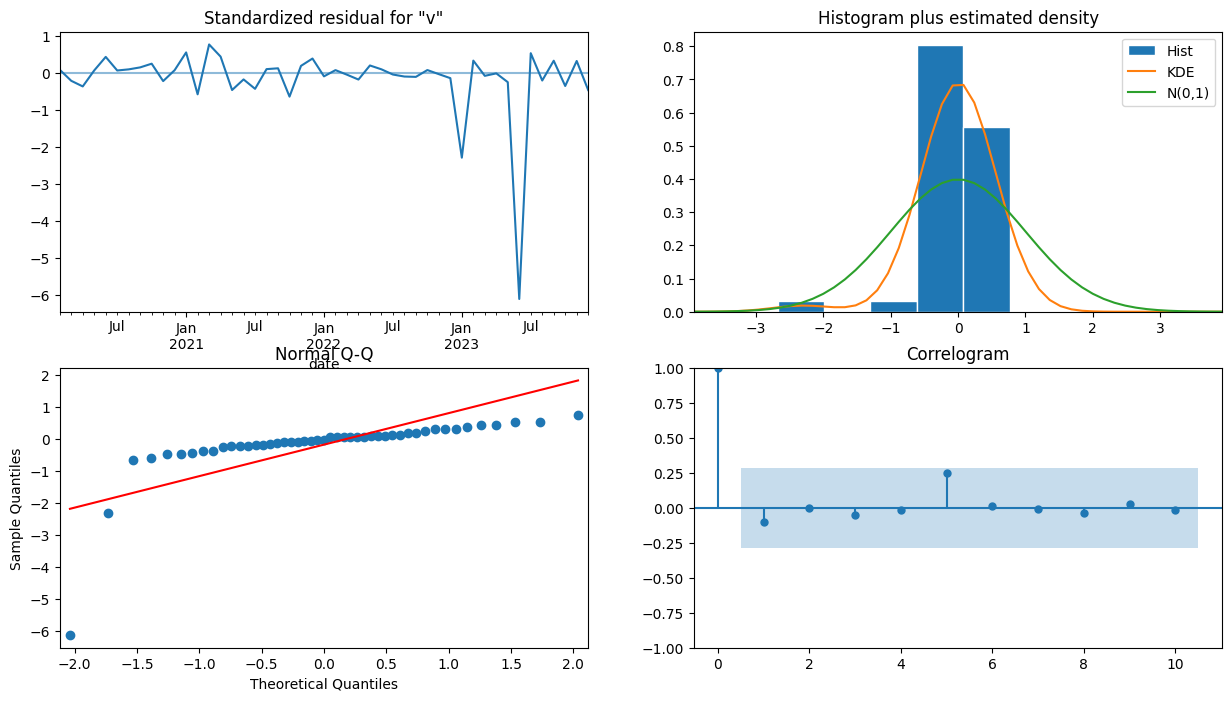

In [87]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
data['date'] = pd.to_datetime(data['date'])
data = data[data['sector'] == 'Industry']
data_monthly = data.resample('M', on='date').sum()
decomposition = seasonal_decompose(data_monthly['value'], model='additive')
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12
sarima_model = sm.tsa.SARIMAX(data_monthly['value'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()
sarima_result.plot_diagnostics(figsize=(15, 8))
plt.show()

# **10. Visualization of Sector Data:** Use data visualization to present insights on sector trends, patterns, and variations.

Line Plots for Sector Trends:

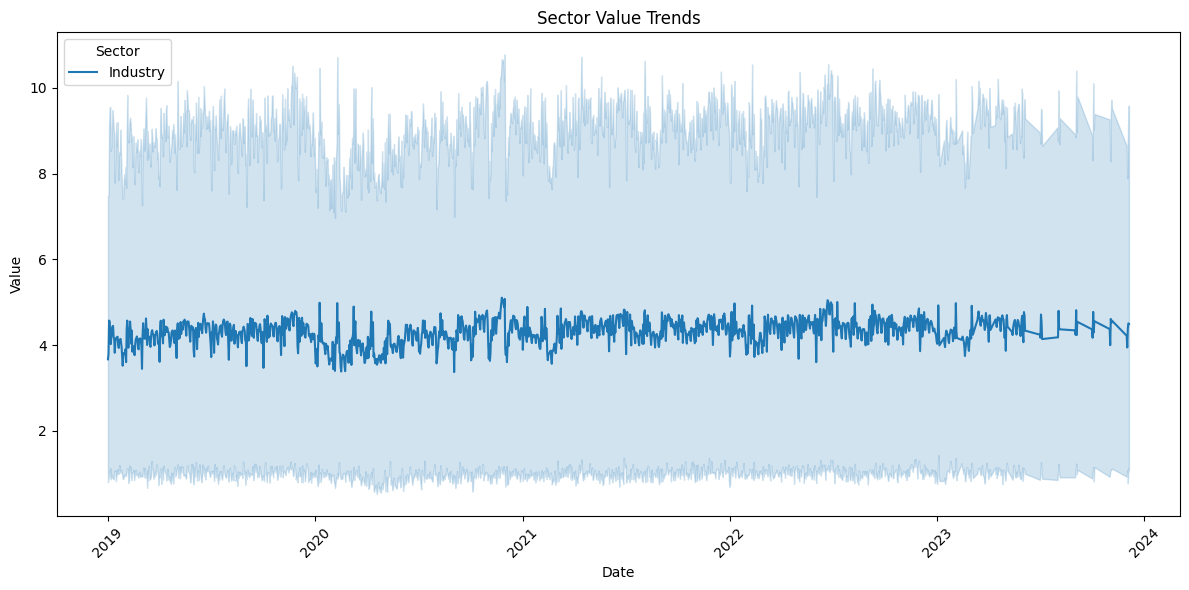

In [88]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='date', y='value', hue='sector')
plt.title('Sector Value Trends')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Sector', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Bar Plots for Sector Patterns:

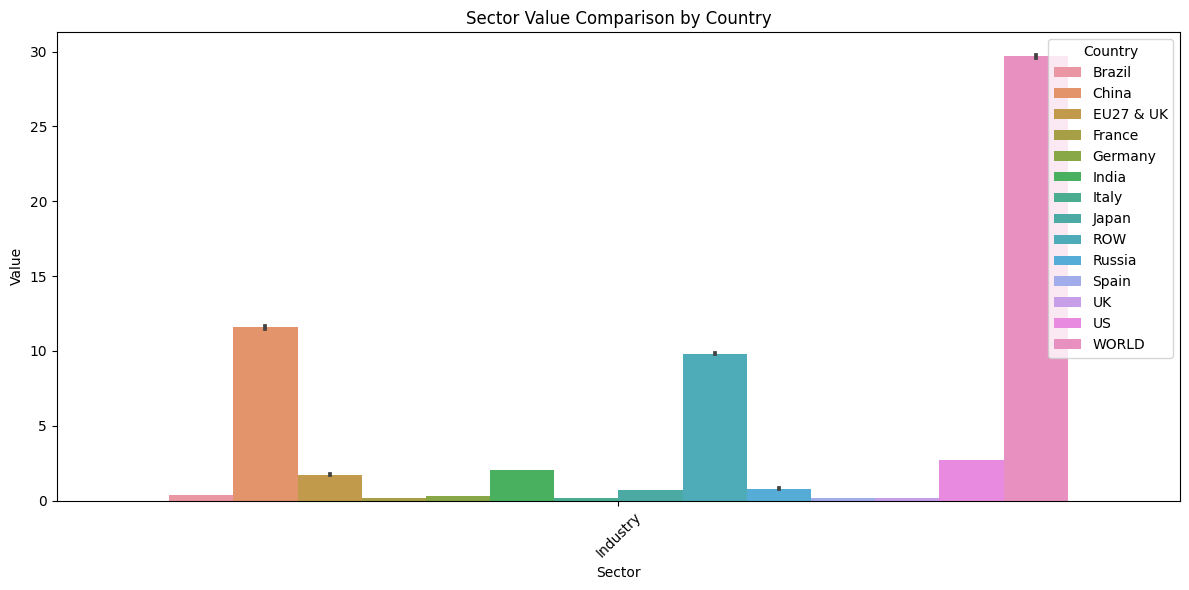

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='sector', y='value', hue='country')
plt.title('Sector Value Comparison by Country')
plt.xlabel('Sector')
plt.ylabel('Value')
plt.legend(title='Country', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Box Plots for Variations:

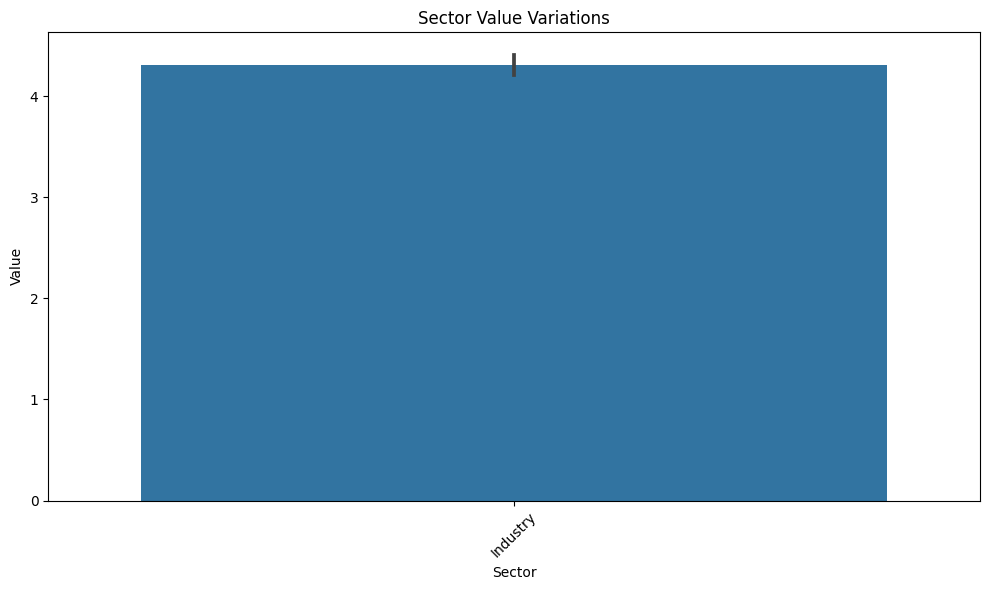

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='sector', y='value')
plt.title('Sector Value Variations')
plt.xlabel('Sector')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Overlaying Events on Line Plots:

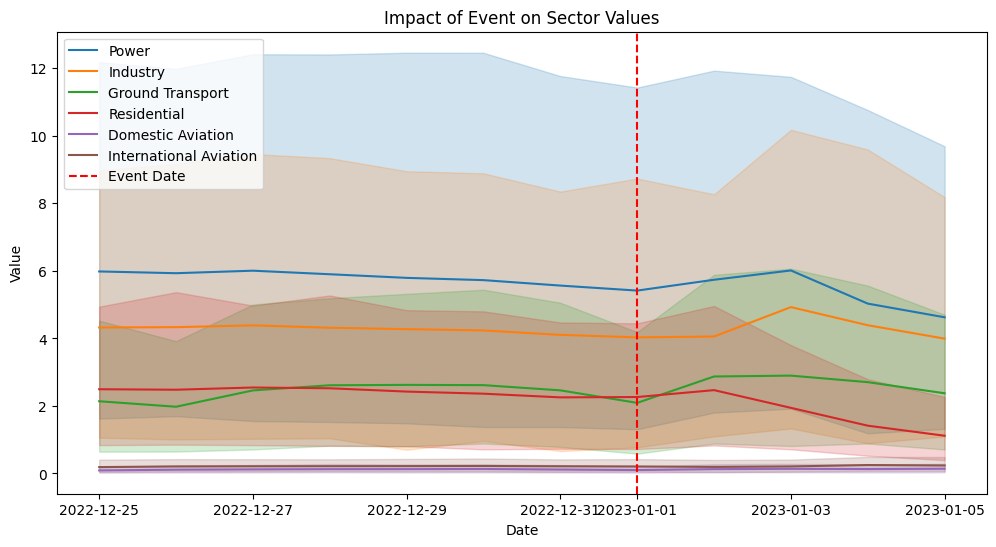

In [91]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=event_data, x='date', y='value', hue='sector')
plt.axvline(event_date, color='red', linestyle='--', label='Event Date')
plt.title('Impact of Event on Sector Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()


# **11. Correlation Analysis:** Explore correlations between sector values and other variables.


In [92]:
correlation_matrix = data.corr()

<ipython-input-92-19e8f3752a40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


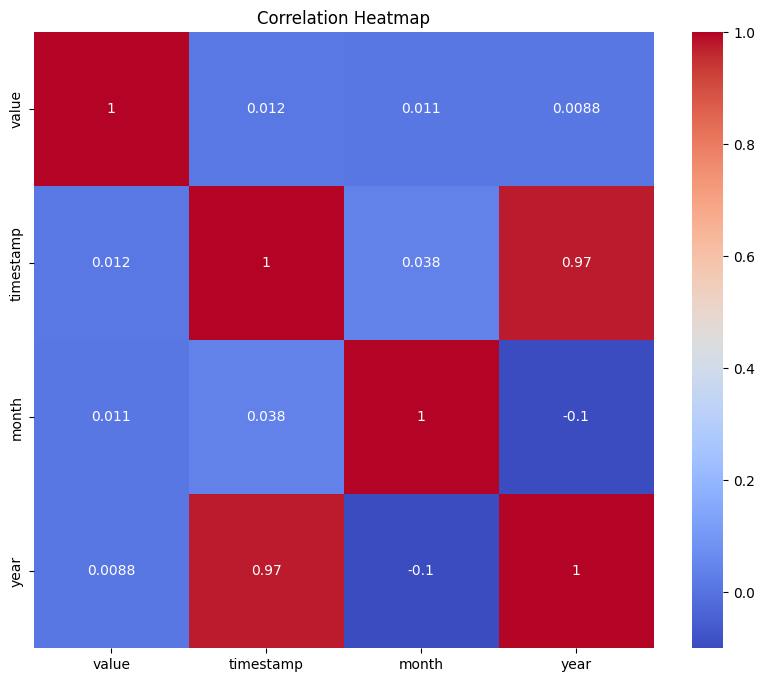

In [93]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Here we conclude that our analysis has illuminated crucial aspects of economic trends, sector contributions, and temporal patterns within the dataset. The knowledge gained from this project contributes to a more informed understanding of the economic landscape and its potential impacts on various sectors and countries.